In [1]:
import pandas as pd

%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

# goal

Brazilian public health system has a long queue wait time: some people wait for years to do exams and surgeries.
In this notebook, I analyzed the queue records in order to find ways to reduce the waiting time.

# dataset

The data used for these analyzes are available at https://drive.google.com/open?id=10YGsNwr8dQWXZhr9i6z-Ttp10GYHTg3N.

Updated data can be queried at https://listadeespera.saude.sc.gov.br/consulta/completa.html.

In [2]:
filename = '~/Downloads/public_queue-2017-11-30.csv'
df = pd.read_csv(filename)

In [3]:
df.columns

Index(['SERVIÇO', 'CENTRAL DE REGULAÇÃO/RESPONSÁVEL',
       'MUNICÍPIO DE RESIDÊNCIA', 'POSIÇÃO', 'TEMPO MÉDIO DE ESPERA(DIAS)',
       'CLASSIFICAÇÃO', 'TIPO DA LISTA', 'DOCUMENTO', 'DATA DA SOLICITAÇÃO',
       'CIDADÃO', 'NASCIMENTO', 'DESCRIÇÃO DO PROCEDIMENTO',
       'CNES DA CENTRAL SOLICITANTE', 'CNES DA CENTRAL EXECUTANTE',
       'CNES DA UNIDADE SOLICITANTE', 'CÓDIGO SIGTAP DO PROCEDIMENTO',
       'DESCRIÇÃO DO GRUPO DO PROCEDIMENTO'],
      dtype='object')

In [4]:
df.rename(columns={'MUNICÍPIO DE RESIDÊNCIA': 'city_of_residence',
                   'CENTRAL DE REGULAÇÃO/RESPONSÁVEL': 'regulation_center',
                   'TEMPO MÉDIO DE ESPERA(DIAS)': 'average_waiting_days',
                   'DATA DA SOLICITAÇÃO': 'request_date',
                   'DESCRIÇÃO DO PROCEDIMENTO': 'procedure_description',
                   'CNES DA CENTRAL EXECUTANTE': 'executing_center_code',
                   'CNES DA CENTRAL SOLICITANTE': 'requesting_centra_code',
                   'CNES DA UNIDADE SOLICITANTE': 'requesting_unit_code',
                   'CÓDIGO SIGTAP DO PROCEDIMENTO': 'procedure_code',
                   'DESCRIÇÃO DO GRUPO DO PROCEDIMENTO': 'description_of_the_procedure_group',
                   'SERVIÇO': 'service',
                   'CLASSIFICAÇÃO': 'classification',
                   'TIPO DA LISTA': 'list_type',
                   'DOCUMENTO': 'document',
                   'CIDADÃO': 'name', 
                   'NASCIMENTO': 'date_of_birth',
                   'POSIÇÃO': 'position'
                  }, inplace=True)

In [5]:
df.shape

(1306967, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306967 entries, 0 to 1306966
Data columns (total 17 columns):
service                               1306967 non-null object
regulation_center                     1306967 non-null object
city_of_residence                     1306967 non-null object
position                              1306967 non-null int64
average_waiting_days                  1288724 non-null float64
classification                        1306967 non-null object
list_type                             1306967 non-null object
document                              1306967 non-null object
request_date                          1306273 non-null object
name                                  1306967 non-null object
date_of_birth                         0 non-null float64
procedure_description                 1306967 non-null object
requesting_centra_code                1306967 non-null object
executing_center_code                 1306966 non-null object
requesting_unit_code    

In [7]:
df.sample(10)

,service,regulation_center,city_of_residence,position,average_waiting_days,classification,list_type,document,request_date,name,date_of_birth,procedure_description,requesting_centra_code,executing_center_code,requesting_unit_code,procedure_code,description_of_the_procedure_group
511504,Exame,UNIDADE DE SAUDE SANTA TEREZINHA,BRUSQUE,536,22.0,3 - Verde,Regulada,700203454256529,19/09/2017 15:53:35,A A S,NaN,TESTE SCHIMER,7019815,7019815,2512971,211060216.0,GRUPO - CONSULTA OFTALMOLOGIA (PRIMEIRA CONSUL...
1070815,Exame,POLICLINICA LINDOLF BELL,BLUMENAU,417,316.0,4 - Azul,Regulada,701807212134274,24/05/2017 09:58:55,N T,NaN,PROVA DE FUNCAO PULMONAR COMPLETA C/ BRONCODIL...,2353654,2353654,2552841,211080055.0,GRUPO - DIAGNOSTICO EM PNEUMOLOGIA
898572,Exame,SECRETARIA MUNICIPAL DE SAUDE,MONTE CASTELO,65,20.0,4 - Azul,Regulada,704505627386420,23/11/2017 09:43:20,V S,NaN,RESSONANCIA MAGNETICA DE COLUNA LOMBO-SACRA,421110,5993067,6380204,207010048.0,GRUPO - RESSONANCIA MAGNETICA
563638,Consulta,CENTRO INTEGRADO DE SAUDE NORTE,CHAPECO,8802,58.0,4 - Azul,Regulada,709503647963570,08/11/2017 14:11:32,M J C D S,NaN,CONSULTA EM OFTALMOLOGIA - GERAL,7974671,7974671,2537745,301010072.0,NaN
453854,Exame,UNIDADE DE SAUDE FAZENDA DA ARMACAO DA PIEDADE,GOVERNADOR CELSO RAMOS,245,96.0,4 - Azul,Regulada,701800277804375,25/08/2017 09:12:21,M A S,NaN,COLESTEROL (HDL),6372732,6372732,2418878,202010279.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
1246762,Exame,CENTRO DE SAUDE BELA VISTA,PALHOCA,10655,127.0,4 - Azul,Fila única,702004840064580,30/10/2017 11:29:50,M M A,NaN,TGP,6082351,6939392,2418320,202010651.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
533877,Exame,UNIDADE DE SAUDE DOM JOAQUIM 2,BRUSQUE,1567,27.0,4 - Azul,Regulada,702007376424882,30/10/2017 14:19:15,M I M S,NaN,ULTRA-SONOGRAFIA DE ARTICULACAO OMBRO DIREITO,7019815,7019815,7005962,205020062.0,GRUPO - DIAGNOSTICO POR ULTRA-SONOGRAFIA
477758,Consulta,UNIDADE DE SAUDE STEFFEN,BRUSQUE,607,31.0,4 - Azul,Fila única,700709972809372,25/08/2017 12:55:14,E A D S,NaN,CONSULTA EM ORTOPEDIA - GERAL,7019815,7019815,2513633,301010072.0,NaN
321988,Exame,CENTRO DE SAUDE MADRI,PALHOCA,12161,134.0,4 - Azul,Fila única,707004860980931,27/10/2017 14:04:48,P C D A E S,NaN,TIROXINA LIVRE (T4 LIVRE),421190,6082351,2418339,202060381.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
43208,Consulta,UNIDADE BASICA DE SAUDE PSF METROPOL,CRICIUMA,30,37.0,4 - Azul,Regulada,700008990466703,30/10/2017 15:40:45,R L V,NaN,CONSULTA EM HEMATOLOGIA - ONCOLOGIA,7937547,7937547,2647303,301010072.0,NaN


# requested services by city

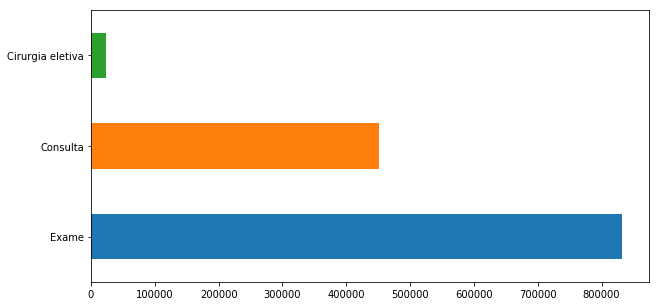

In [8]:
df.service.value_counts().plot(kind='barh', figsize=(10, 5))

"Palhoça" is the most frequent city in queue:

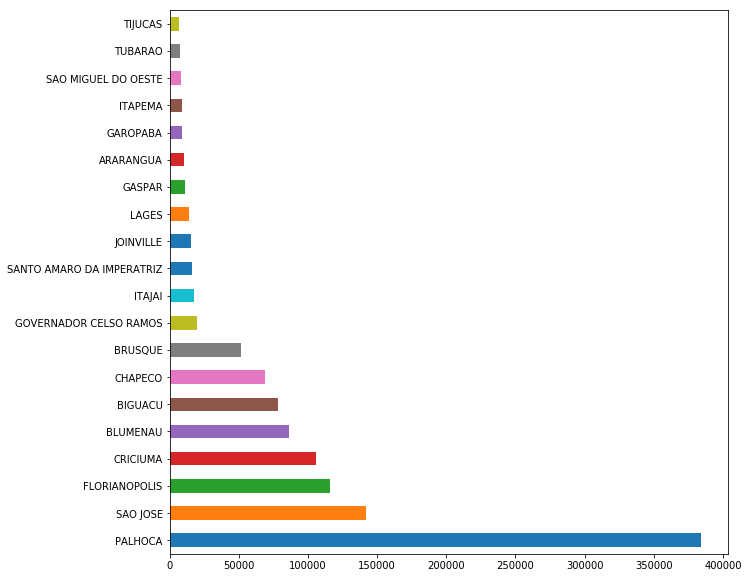

In [9]:
df.city_of_residence.value_counts().head(20).plot(kind='barh', figsize=(10,10))

Separating by "service", it is clear that the peak of Palhoça is in the exams:

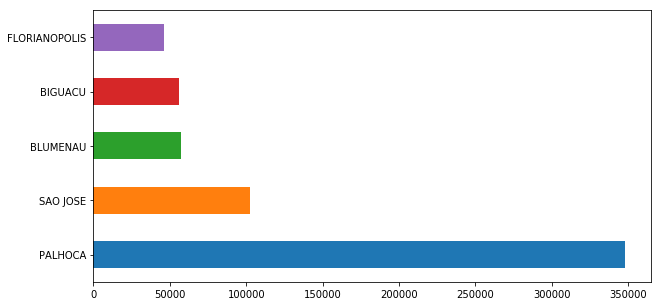

In [10]:
df.query('service == "Exame"').city_of_residence.value_counts().head().plot(kind='barh', figsize=(10, 5))

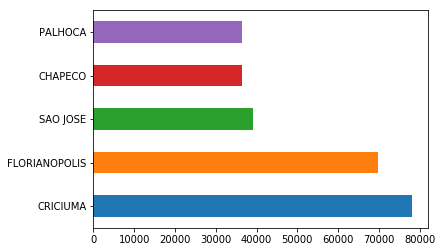

In [11]:
df.query('service == "Consulta"').city_of_residence.value_counts().head().plot(kind='barh')

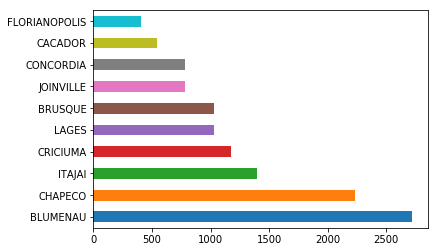

In [12]:
df.query('service == "Cirurgia eletiva"').city_of_residence.value_counts().head(10).plot(kind='barh')

# average exams per patient and city

Let's compare the number os exams by patient in Palhoça and other cities.

Palhoça has between 3 and 5x more exams per patient on average than other cities with high number of exams requested:

In [13]:
df.query('service == "Exame" and city_of_residence == "PALHOCA"').document.value_counts().describe()

count    31797.000000
mean        10.941693
std         12.505739
min          1.000000
25%          2.000000
50%          4.000000
75%         18.000000
max         90.000000
Name: document, dtype: float64

In [14]:
df.query('service == "Exame" and city_of_residence == "SAO JOSE"').document.value_counts().describe()

count    54560.000000
mean         1.878611
std          1.901741
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         35.000000
Name: document, dtype: float64

In [15]:
df.query('service == "Exame" and city_of_residence == "BLUMENAU"').document.value_counts().describe()

count    20505.000000
mean         2.807949
std          2.959257
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         35.000000
Name: document, dtype: float64

In [16]:
df.query('service == "Exame" and city_of_residence == "BIGUACU"').document.value_counts().describe()

count    18393.000000
mean         3.030338
std          3.800691
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         37.000000
Name: document, dtype: float64

In [17]:
df.query('service == "Exame" and city_of_residence == "FLORIANOPOLIS"').document.value_counts().describe()

count    28094.000000
mean         1.632769
std          1.789597
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: document, dtype: float64

# patients with many exams

Looking a little deeper, let's check some patients with more exams requested:

In [18]:
df.query('service == "Exame" and city_of_residence == "PALHOCA"').document.value_counts().head(15)

704207709501384    90
700603418445267    80
700000291920300    80
700505394201153    78
702005327186289    77
707507227682290    75
700000481327406    73
705009265166954    72
702505393010938    72
704300595817291    71
700401459979541    71
700000538700909    70
708402202548668    70
708507058823680    70
706209092555063    70
Name: document, dtype: int64

Requests happen at the same timestamp, possibly indicating a system bug. Exams enter the queue of different performing centers:

In [19]:
(
    df
    .query('document == 704207709501384')
    [['procedure_description','request_date', 'regulation_center', 
      'position', 'executing_center_code', 'requesting_unit_code']]
    .sort_values(by='procedure_description')
    .head(10)
)

,procedure_description,request_date,regulation_center,position,executing_center_code,requesting_unit_code
264552,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,6519,6082351,7124619
1189115,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,4990,6939392,7124619
300253,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224544,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619
264515,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
1189078,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
1189079,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
264516,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
300254,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224545,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619


In [20]:
(
    df
    .query('document == 700603418445267')
    [['procedure_description','request_date', 'regulation_center', 
      'position', 'executing_center_code', 'requesting_unit_code']]
    .sort_values(by='procedure_description')
    .head(10)
)

,procedure_description,request_date,regulation_center,position,executing_center_code,requesting_unit_code
194548,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134084,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194549,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134085,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194550,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134086,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
1134105,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194569,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018
1134106,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194570,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018


# quantifying duplication

If we removed all duplicates, the queue would have a 17% reduction in records (20% exams, 11% consultations and 1% surgeries).

In [21]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['document', 'procedure_description']))
    unique_rows_same_date = len(df_tmp.groupby(['document', 'procedure_description', 'request_date']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           records in queue:', total_rows)
    print('    unique records in queue:', unique_rows)
    print('         duplicated (total):', total_rows - unique_rows)
    print('duplicates (same timestamp):', total_rows - unique_rows_same_date)
    print('             queue decrease:', int(100 * reducao_fila), '%')

In [22]:
deduplicate_stats()

           records in queue: 1306967
    unique records in queue: 1080625
         duplicated (total): 226342
duplicates (same timestamp): 222124
             queue decrease: 17 %


In [23]:
deduplicate_stats('service == "Exame"')

           records in queue: 832611
    unique records in queue: 658907
         duplicated (total): 173704
duplicates (same timestamp): 171493
             queue decrease: 20 %


In [24]:
deduplicate_stats('service == "Consulta"')

           records in queue: 451122
    unique records in queue: 398828
         duplicated (total): 52294
duplicates (same timestamp): 50405
             queue decrease: 11 %


In [25]:
deduplicate_stats('service == "Cirurgia eletiva"')

           records in queue: 23234
    unique records in queue: 22890
         duplicated (total): 344
duplicates (same timestamp): 226
             queue decrease: 1 %


### deduplication by city

Applying deduplication strategy in Palhoça, the queue would decrease 41%.

In [26]:
deduplicate_stats('city_of_residence == "PALHOCA"')

           records in queue: 384253
    unique records in queue: 223579
         duplicated (total): 160674
duplicates (same timestamp): 160305
             queue decrease: 41 %


In [27]:
deduplicate_stats('service == "Exame" and city_of_residence == "PALHOCA"')

           records in queue: 347913
    unique records in queue: 199099
         duplicated (total): 148814
duplicates (same timestamp): 148594
             queue decrease: 42 %


In [28]:
deduplicate_stats('service == "Consulta" and city_of_residence == "PALHOCA"')

           records in queue: 36313
    unique records in queue: 24453
         duplicated (total): 11860
duplicates (same timestamp): 11711
             queue decrease: 32 %


In [29]:
deduplicate_stats('service == "Exame" and city_of_residence == "SAO JOSE"')

           records in queue: 102497
    unique records in queue: 101021
         duplicated (total): 1476
duplicates (same timestamp): 576
             queue decrease: 1 %


In [30]:
deduplicate_stats('service == "Exame" and city_of_residence == "BLUMENAU"')

           records in queue: 57577
    unique records in queue: 57535
         duplicated (total): 42
duplicates (same timestamp): 24
             queue decrease: 0 %


In [31]:
deduplicate_stats('service == "Consulta" and city_of_residence == "BLUMENAU"')

           records in queue: 26156
    unique records in queue: 26139
         duplicated (total): 17
duplicates (same timestamp): 3
             queue decrease: 0 %


In [32]:
deduplicate_stats('service == "Exame" and city_of_residence == "BIGUACU"')

           records in queue: 55737
    unique records in queue: 45188
         duplicated (total): 10549
duplicates (same timestamp): 10037
             queue decrease: 18 %


In [33]:
deduplicate_stats('service == "Consulta" and city_of_residence == "BIGUACU"')

           records in queue: 22435
    unique records in queue: 14648
         duplicated (total): 7787
duplicates (same timestamp): 7705
             queue decrease: 34 %


In [34]:
deduplicate_stats('service == "Exame" and city_of_residence == "FLORIANOPOLIS"')

           records in queue: 45871
    unique records in queue: 45754
         duplicated (total): 117
duplicates (same timestamp): 3
             queue decrease: 0 %


In [35]:
deduplicate_stats('service == "Consulta" and city_of_residence == "FLORIANOPOLIS"')

           records in queue: 69684
    unique records in queue: 67698
         duplicated (total): 1986
duplicates (same timestamp): 1633
             queue decrease: 2 %


In [36]:
deduplicate_stats('service == "Exame" and city_of_residence == "BRUSQUE"')

           records in queue: 42011
    unique records in queue: 41479
         duplicated (total): 532
duplicates (same timestamp): 440
             queue decrease: 1 %


In [37]:
deduplicate_stats('service == "Exame" and city_of_residence == "CHAPECO"')

           records in queue: 30321
    unique records in queue: 30313
         duplicated (total): 8
duplicates (same timestamp): 1
             queue decrease: 0 %


In [38]:
deduplicate_stats('service == "Exame" and city_of_residence == "CRICIUMA"')

           records in queue: 26435
    unique records in queue: 22584
         duplicated (total): 3851
duplicates (same timestamp): 3826
             queue decrease: 14 %


In [39]:
deduplicate_stats('service == "Exame" and city_of_residence == "GOVERNADOR CELSO RAMOS"')

           records in queue: 14941
    unique records in queue: 14413
         duplicated (total): 528
duplicates (same timestamp): 422
             queue decrease: 3 %


In [40]:
deduplicate_stats('service == "Exame" and city_of_residence == "JOINVILLE"')

           records in queue: 11112
    unique records in queue: 11111
         duplicated (total): 1
duplicates (same timestamp): 0
             queue decrease: 0 %


In [41]:
deduplicate_stats('service == "Exame" and city_of_residence == "SANTO AMARO DA IMPERATRIZ"')

           records in queue: 11091
    unique records in queue: 10667
         duplicated (total): 424
duplicates (same timestamp): 381
             queue decrease: 3 %


As the percentage of duplications varies greatly between cities (from 0 to 42%), the problem seems to be linked to the scheduling center of some municipalities such as Palhoça and Biguaçu.

### deduplicating records with the same timestamps

In [42]:
len(df)

1306967

In [43]:
df.drop_duplicates(subset=['document', 'procedure_description', 'request_date'], inplace=True)
len(df)

1084843

### duplicate with different timestamps

There is also another kind of duplication: registers with different timestamps.

In [44]:
(
    df
    .query('service == "Consulta" and city_of_residence == "FLORIANOPOLIS"')
    .groupby(['document', 'procedure_description'])
    .count()
    .query('service > 1')
    .head(10)
)

,,service,regulation_center,city_of_residence,position,average_waiting_days,classification,list_type,request_date,name,date_of_birth,requesting_centra_code,executing_center_code,requesting_unit_code,procedure_code,description_of_the_procedure_group
document,procedure_description,,,,,,,,,,,,,,,
102565283890005,CONSULTA EM ORTOPEDIA - JOELHO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
106406250770005,CONSULTA EM ORTOPEDIA (OMBROS),4,4,4,4,4,4,4,4,4,0,4,4,4,4,0
106494974700008,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
107850981400007,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120268161090008,CONSULTA EM ORTOPEDIA - JOELHO,3,3,3,3,3,3,3,3,3,0,3,3,3,3,0
120522676990000,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120788847680004,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
121472585140003,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
122183393410004,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0


The same patient scheduled 4 appointments with orthopedist in 1 year. Has he lost the scheduling paper?
Can we clean it up - keep the patient at 314th position and delete the other records?
If he goes in one appointment (314th position), the following are even marked?

In [45]:
df.query('document == 106406250770005')[['service', 'position', 'request_date', 
                                         'procedure_description', 'executing_center_code']]

,service,position,request_date,procedure_description,executing_center_code
818446,Consulta,314,24/07/2012 09:32:26,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818622,Consulta,490,19/11/2012 09:48:33,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818878,Consulta,746,21/06/2013 16:07:22,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818943,Consulta,811,26/07/2013 17:31:28,CONSULTA EM ORTOPEDIA (OMBROS),2692260


# patients with the same procedure more than once in queue

In [46]:
unique_rows = df.groupby(['document', 'procedure_description'])
duplicated = (
    df
    .groupby(['document', 'procedure_description'])
    .count()
    .query('service > 1')[['service']]
    .rename(columns={'service': 'duplicated'})
)
duplicated.to_csv('duplicated_patients.csv', index=False)
print('Patients with duplication appointments:', duplicated.shape[0])

Patients with duplication appointments: 3996


In [47]:
duplicated.sort_values(by='duplicated', ascending=False).head(15)

,,duplicated
document,procedure_description,
898002302685808,TOMOGRAFIA COMPUTADORIZADA DO ABDOMEN SUPERIOR,11
709201250723236,CONSULTA EM ORTOPEDIA (OMBROS),6
898000360892436,ESTUDO URODINAMICO,6
898003386998498,CONSULTA EM REABILITACAO INTELECTUAL /AUTISMO,5
898002352416886,ULTRA-SONOGRAFIA DE MAMAS (BILATERAL),5
203455784940000,CONSULTA EM ORTOPEDIA - COLUNA,5
898050021266281,ENDOSCOPIA DIGESTIVA ALTA,4
898002286426432,CONSULTA EM ORTOPEDIA - COLUNA,4
708208193824642,CONSULTA EM GASTROENTEROLOGIA - GERAL,4


# queue without duplicates

In [48]:
df_deduplified = df.sort_values(by='position')
df_deduplified.drop_duplicates(subset=['document', 'procedure_description'], keep='first', inplace=True)
df_deduplified.to_csv('deduplicated_queue.csv', index=False)
print(' queue size without procedure duplication:', df_deduplified.shape[0])

 queue size without procedure duplication: 1080625
